---
format:
  html:
    embed-resources: true
---

In [ ]:
import yfinance as yf
ndx_data = yf.download("^NDX", start="2023-02-01", end="2023-03-31")
ndx_close = ndx_data[['Close']]
ndx_close.to_csv("./dataset/ndx_close_2023Q1.csv")
print("NDX close prices saved to 'ndx_close_2023Q1.csv'")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

NDX close prices saved to 'ndx_close_2023Q1.csv'


# MLP

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/4090949923.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date'] = pd.to_datetime(underlying['Date'])


Epoch 1/30


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 623us/step - loss: 567207.1875 - val_loss: 9934.7686
Epoch 2/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 602us/step - loss: 24848.7461 - val_loss: 1752.0624
Epoch 3/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 600us/step - loss: 18953.5371 - val_loss: 980.0056
Epoch 4/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 620us/step - loss: 16976.7031 - val_loss: 846.1729
Epoch 5/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 603us/step - loss: 15479.1074 - val_loss: 870.1966
Epoch 6/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 599us/step - loss: 14088.6562 - val_loss: 858.9459
Epoch 7/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 611us/step - loss: 12890.7900 - val_loss: 1252.3911
Epoch 8/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 587us/step - loss: 12084.7871 - val_loss: 1638.3450
Epoch 9/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 588us/step - loss: 11109.7617 - val_loss: 2793.8013
Epoch 10/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4s 593us/step - loss: 10381.1348 - val_loss: 996.9709
Epoch 11/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 4

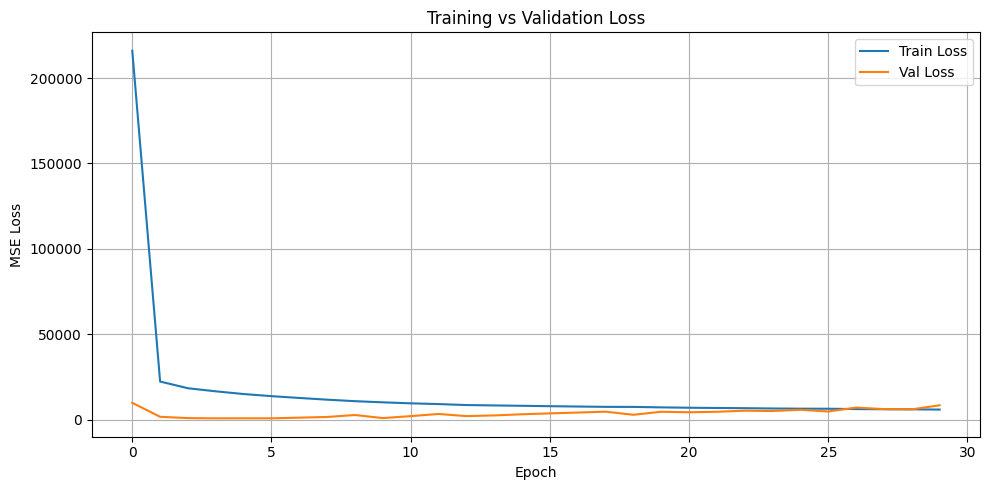

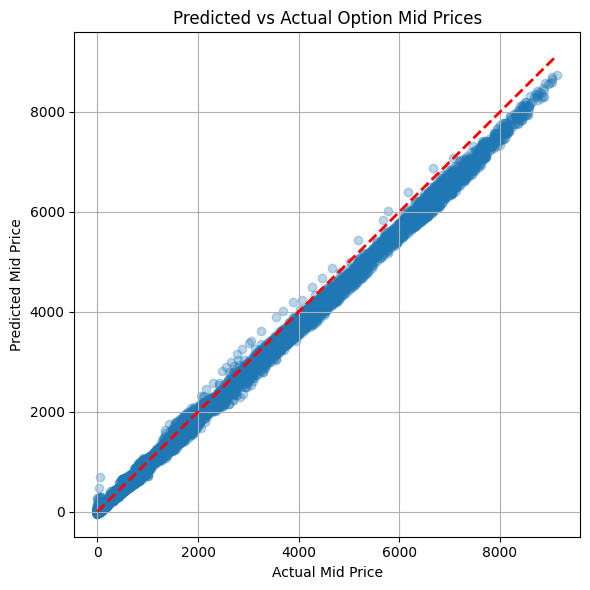

In [ ]:
# # Import libraries
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Load raw option data and underlying prices
# options_path = "dataset/ndx_option_raw.csv"
# underlying_path = "dataset/ndx_close_2023Q1.csv"
# options = pd.read_csv(options_path)
# underlying = pd.read_csv(underlying_path)

# # Clean & prepare date columns
# options['date']  = pd.to_datetime(options['date'])
# options['exdate'] = pd.to_datetime(options['exdate'])
# underlying['Date'] = pd.to_datetime(underlying['Date'])

# # Drop completely empty or irrelevant columns
# # forward_price is all NaN, so drop it
# if 'forward_price' in options.columns:
#     options = options.drop(columns=['forward_price'])

# # Feature engineering on options data
# # calculate mid-market price
# options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2

# # compute days to expiration
# options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days

# # encode call/put flag
# options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# # Prepare underlying price data
# underlying = underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'})

# # Merge option data with underlying price on trade date
# df = pd.merge(
#     options,
#     underlying[['date', 'underlying_price']],
#     on='date',
#     how='left'
# )

# # Drop rows with missing critical values
# required_cols = [
#     'underlying_price','strike_price','cp_flag_encoded',
#     'days_to_expiry','impl_volatility','delta','gamma','vega','theta','mid_price'
# ]
# df = df.dropna(subset=required_cols)

# # Select features and target
# features = [
#     'underlying_price','strike_price','cp_flag_encoded',
#     'days_to_expiry','impl_volatility','delta','gamma','vega','theta'
# ]
# X = df[features]
# y = df['mid_price']

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# #Step 11: Normalize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled  = scaler.transform(X_test)

# # Build the MLP model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dropout(0.2),                     # prevent overfitting
#     Dense(32, activation='relu'),
#     Dense(1)                          # single output for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=30,
#     batch_size=64,
#     validation_split=0.2,
#     verbose=1
# )

# # Evaluate on test set
# y_pred = model.predict(X_test_scaled).flatten()
# mse = mean_squared_error(y_test, y_pred)
# r2  = r2_score(y_test, y_pred)
# print(f"Test MSE: {mse:.4f}")
# print(f"Test R²:  {r2:.4f}")

# # Plot training & validation loss
# plt.figure(figsize=(10,5))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title("Training vs Validation Loss")
# plt.xlabel("Epoch")
# plt.ylabel("MSE Loss")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Scatter plot of predicted vs actual prices
# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()],
#          [y_test.min(), y_test.max()],
#          'r--', linewidth=2)
# plt.title("Predicted vs Actual Option Mid Prices")
# plt.xlabel("Actual Mid Price")
# plt.ylabel("Predicted Mid Price")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

## K folder

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/2704786733.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date'] = pd.to_datetime(underlying['Date'])
/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4499/4499 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4499/4499 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4499/4499 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4499/4499 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4499/4499 ━━━━━━━━━━━━━━━━━━━━ 1s 240us/step
K-Fold MSE: [1297.0896684984596, 3195.940745158039, 1140.832698063874, 1574.1076880014523, 1109.233770140666]
K-Fold R² : [0.9990588043739024, 0.997713871962531, 0.9991617088064731, 0.9988637330883496, 0.9991874465206736]
Average MSE: 1663.4409139724983
Average R² : 0.998797112950386


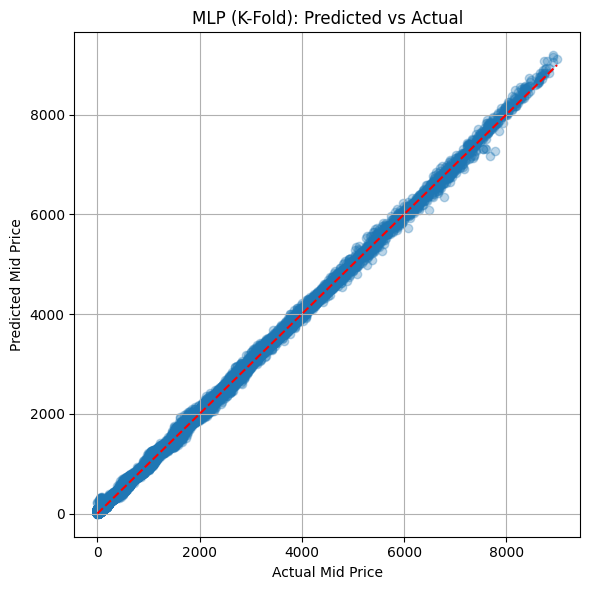

In [ ]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# import matplotlib.pyplot as plt

# # Load data
# options = pd.read_csv("dataset/ndx_option_raw.csv")
# underlying = pd.read_csv("dataset/ndx_close_2023Q1.csv")

# # Preprocess dates
# options['date'] = pd.to_datetime(options['date'])
# options['exdate'] = pd.to_datetime(options['exdate'])
# underlying['Date'] = pd.to_datetime(underlying['Date'])
# underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)

# # Feature engineering
# options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2
# options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days
# options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# # Merge underlying price
# df = pd.merge(options, underlying[['date', 'underlying_price']], on='date', how='left')

# # Drop missing rows and define features
# required_cols = [
#     'underlying_price','strike_price','cp_flag_encoded','days_to_expiry',
#     'impl_volatility','delta','gamma','vega','theta','mid_price'
# ]
# df = df.dropna(subset=required_cols)
# features = [
#     'underlying_price','strike_price','cp_flag_encoded','days_to_expiry',
#     'impl_volatility','delta','gamma','vega','theta'
# ]
# X = df[features].values
# y = df['mid_price'].values

# # Normalize
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # K-Fold cross validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# mse_list = []
# r2_list = []

# for train_idx, test_idx in kf.split(X_scaled):
#     X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]

#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#         Dropout(0.2),
#         Dense(32, activation='relu'),
#         Dense(1)
#     ])
#     model.compile(optimizer='adam', loss='mse')
#     model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0)

#     y_pred = model.predict(X_test).flatten()
#     mse_list.append(mean_squared_error(y_test, y_pred))
#     r2_list.append(r2_score(y_test, y_pred))

# # Output results
# print("K-Fold MSE:", mse_list)
# print("K-Fold R² :", r2_list)
# print("Average MSE:", np.mean(mse_list))
# print("Average R² :", np.mean(r2_list))

# # Plot last fold result
# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Actual Mid Price")
# plt.ylabel("Predicted Mid Price")
# plt.title("MLP (K-Fold): Predicted vs Actual")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

## Group K Fold

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/2659475713.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date'] = pd.to_datetime(underlying['Date'])
/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 1s 248us/step
Fold 1 — MSE: 11792.77, R²: 0.9917


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4831/4831 ━━━━━━━━━━━━━━━━━━━━ 1s 255us/step
Fold 2 — MSE: 1179.90, R²: 0.9992


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4420/4420 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step
Fold 3 — MSE: 1283.59, R²: 0.9991


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4407/4407 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step
Fold 4 — MSE: 12976.49, R²: 0.9901


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step
Fold 5 — MSE: 1083.98, R²: 0.9992

Cross‑Validation Summary:
MSEs: [11792.76689715667, 1179.9004413807393, 1283.5906570489728, 12976.489656504758, 1083.9805367362942]
R²s : [0.9916507017881196, 0.9991900241535074, 0.9990698018997345, 0.9901417909671124, 0.9991734427030433]
Average MSE: 5663.35
Average R² : 0.9958


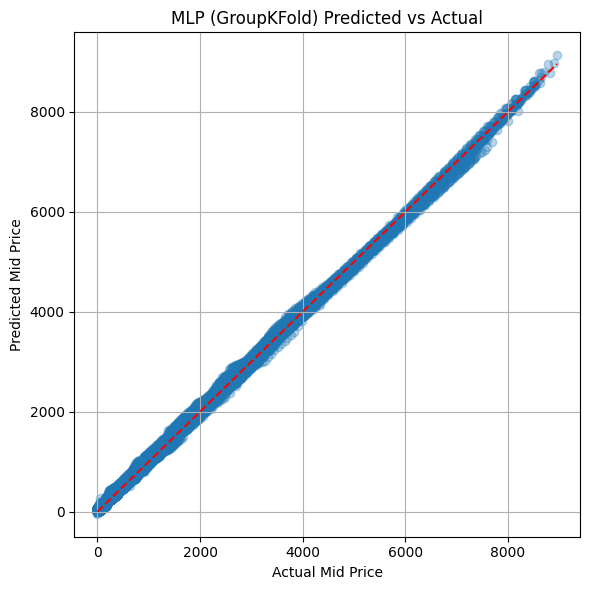

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load option data and underlying index prices
options = pd.read_csv("dataset/ndx_option_raw.csv")
underlying = pd.read_csv("dataset/ndx_close_2023Q1.csv")

# Convert date columns to datetime format
options['date'] = pd.to_datetime(options['date'])
options['exdate'] = pd.to_datetime(options['exdate'])
underlying['Date'] = pd.to_datetime(underlying['Date'])
underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)

# Create new features for the option dataset
options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2
options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days
options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# Merge options data with underlying price based on the trade date
df = pd.merge(
    options,
    underlying[['date', 'underlying_price']],
    on='date', how='left'
)

# Drop rows missing essential fields
required_cols = [
    'underlying_price', 'strike_price', 'cp_flag_encoded',
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'mid_price'
]
df = df.dropna(subset=required_cols)

# Prepare feature matrix and target vector
feature_cols = [
    'underlying_price', 'strike_price', 'cp_flag_encoded',
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta'
]
X = df[feature_cols].values
y = df['mid_price'].values
groups = df['date'].values

# Standardize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform GroupKFold cross-validation
gkf = GroupKFold(n_splits=5)
mse_scores, r2_scores = [], []

for fold_idx, (train_idx, test_idx) in enumerate(gkf.split(X_scaled, y, groups)):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Define MLP model architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0)

    # Generate predictions
    y_pred = model.predict(X_test).flatten()

    # Evaluate predictions
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f"Fold {fold_idx + 1} — MSE: {mse:.2f}, R²: {r2:.4f}")

# Display summary of cross-validation results
print("\nCross-Validation Results:")
print("MSE per fold:", mse_scores)
print("R² per fold :", r2_scores)
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average R² : {np.mean(r2_scores):.4f}")

# Visualize Predicted vs Actual values for the final fold
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Mid Price")
plt.ylabel("Predicted Mid Price")
plt.title("Predicted vs Actual Mid Prices (MLP Model)")
plt.grid(True)
plt.tight_layout()
plt.show()

# LSTM

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/2827884158.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date'] = pd.to_datetime(underlying['Date'])


Epoch 1/30


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 801458.0625 - val_loss: 2748.1760
Epoch 2/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1528.1877 - val_loss: 444.6794
Epoch 3/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 382.8820 - val_loss: 254.5906
Epoch 4/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 224.4888 - val_loss: 209.5489
Epoch 5/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 7s 967us/step - loss: 165.8605 - val_loss: 213.2502
Epoch 6/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 7s 987us/step - loss: 140.5746 - val_loss: 119.0359
Epoch 7/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 126.0103 - val_loss: 136.5172
Epoch 8/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 125.9631 - val_loss: 100.3746
Epoch 9/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 106.2604 - val_loss: 128.4727
Epoch 10/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 105.4891 - val_loss: 91.8640
Epoch 11/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 107.2214 - val_loss

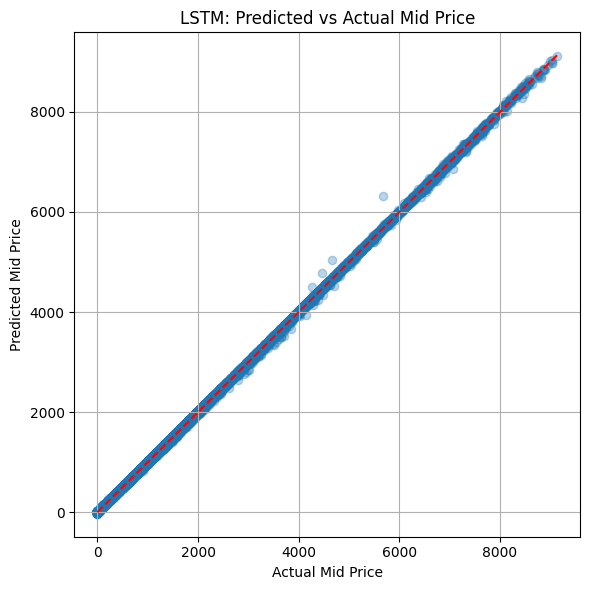

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the raw option data and underlying index prices
options = pd.read_csv("./dataset/ndx_option_raw.csv")
underlying = pd.read_csv("./dataset/ndx_close_2023Q1.csv")

# Convert date columns to proper datetime format
options['date'] = pd.to_datetime(options['date'])
options['exdate'] = pd.to_datetime(options['exdate'])
underlying['Date'] = pd.to_datetime(underlying['Date'])

# Compute the mid price from the best bid and best offer
options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2

# Merge the underlying index price with the options data by matching the trade date
underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)
options = pd.merge(options, underlying, on='date', how='left')

# Encode the call/put flag: assign 1 for call and 0 for put options
options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# Calculate the number of days until expiration for each option
options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days

# Select the desired features and drop rows with missing essential values
required_cols = [
    'underlying_price', 'strike_price', 'cp_flag_encoded',
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'mid_price'
]
df = options[[
    'underlying_price', 'strike_price', 'cp_flag_encoded', 'days_to_expiry',
    'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'mid_price'
]].dropna()

# Define the feature matrix X and the target vector y
features = [
    'underlying_price', 'strike_price', 'cp_flag_encoded',
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta'
]
X = df[features]
y = df['mid_price']

# Split data into training and test sets with an 80/20 ratio (using a fixed random state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the feature matrices to fit the LSTM input requirements: (samples, time steps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model with one LSTM layer followed by two Dense layers
model = Sequential([
    LSTM(64, input_shape=(1, X_train_lstm.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model with 20% of the training data reserved for validation
history = model.fit(X_train_lstm, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Predict the mid prices on the test set and flatten the predictions array
y_pred = model.predict(X_test_lstm).flatten()

# Evaluate the predictions using Mean Squared Error and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for the test set
print(f"Test MSE: {mse:.4f}")
print(f"Test R²:  {r2:.4f}")

# Plot a scatter plot of actual vs. predicted mid prices with a reference line for perfect prediction
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Mid Price")
plt.ylabel("Predicted Mid Price")
plt.title("LSTM: Predicted vs Actual Mid Price")
plt.grid(True)
plt.tight_layout()
plt.show()

## Group K Fold

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/4061828699.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date']= pd.to_datetime(underlying['Date'])



=== Fold 1 ===


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 2s 433us/step
Fold 1 — MSE: 113.39, R²: 0.9999

=== Fold 2 ===


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4831/4831 ━━━━━━━━━━━━━━━━━━━━ 2s 342us/step
Fold 2 — MSE: 365.76, R²: 0.9997

=== Fold 3 ===


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4420/4420 ━━━━━━━━━━━━━━━━━━━━ 2s 339us/step
Fold 3 — MSE: 3570.40, R²: 0.9974

=== Fold 4 ===


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4407/4407 ━━━━━━━━━━━━━━━━━━━━ 2s 354us/step
Fold 4 — MSE: 57.27, R²: 1.0000

=== Fold 5 ===


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 2s 341us/step
Fold 5 — MSE: 26.00, R²: 1.0000

Cross‑Validation Summary
MSE scores: [113.39018244732704, 365.76272065299327, 3570.3998943655583, 57.27234064849076, 26.00099150773367]
R² scores : [0.9999197195657467, 0.9997489118921511, 0.9974125869640071, 0.9999564903359182, 0.9999801737129677]
Average MSE: 826.57
Average R² : 0.9994


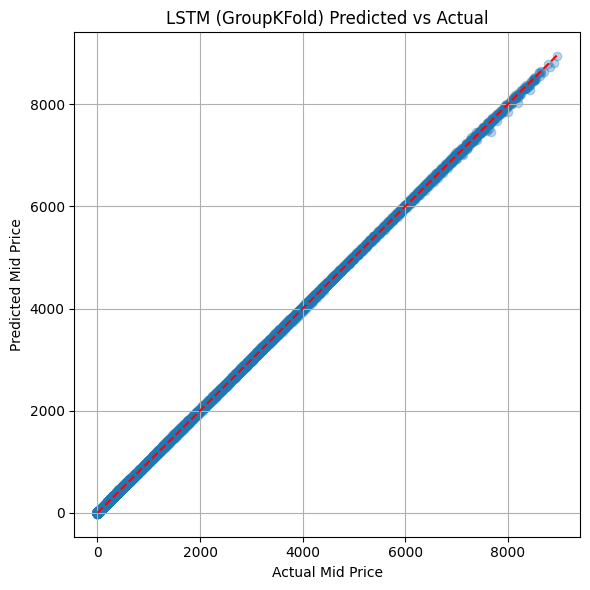

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load option and index price datasets
options = pd.read_csv("dataset/ndx_option_raw.csv")
underlying = pd.read_csv("dataset/ndx_close_2023Q1.csv")

# Convert date columns to datetime type
options['date'] = pd.to_datetime(options['date'])
options['exdate'] = pd.to_datetime(options['exdate'])
underlying['Date'] = pd.to_datetime(underlying['Date'])
underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)

# Basic feature engineering
options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2
options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days
options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# Merge option records with underlying index price
df = pd.merge(
    options,
    underlying[['date', 'underlying_price']],
    on='date',
    how='left'
)

# Remove rows with missing important features
required_features = [
    'underlying_price', 'strike_price', 'cp_flag_encoded',
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'mid_price'
]
df = df.dropna(subset=required_features)

# Prepare inputs for modeling
feature_cols = [
    'underlying_price', 'strike_price', 'cp_flag_encoded',
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta'
]
X = df[feature_cols].values
y = df['mid_price'].values
groups = df['date'].values  # Use trade date for grouping

# Standardize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up GroupKFold cross-validation based on dates
gkf = GroupKFold(n_splits=5)
mse_scores, r2_scores = [], []

for fold_idx, (train_idx, test_idx) in enumerate(gkf.split(X_scaled, y, groups)):
    print(f"\n=== Fold {fold_idx + 1} ===")

    # Split into training and test sets for this fold
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Reshape for LSTM input: (samples, timesteps=1, features)
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Define the LSTM regression model
    model = Sequential([
        LSTM(64, input_shape=(1, X_train_lstm.shape[2])),  # capture sequence patterns
        Dense(32, activation='relu'),
        Dense(1)  # single output for regression
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train model silently (verbose=0)
    model.fit(
        X_train_lstm, y_train,
        epochs=30,
        batch_size=64,
        verbose=0
    )

    # Make predictions and evaluate
    y_pred = model.predict(X_test_lstm).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold_idx + 1} - MSE: {mse:.2f}, R²: {r2:.4f}")

# Print overall cross-validation results
print("\nCross-Validation Results:")
print("MSE per fold:", mse_scores)
print("R² per fold :", r2_scores)
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average R² : {np.mean(r2_scores):.4f}")

# Plot actual vs predicted values for the last fold
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
# Add reference line for perfect prediction
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label='Perfect Prediction'
)
plt.xlabel("Actual Mid Price")
plt.ylabel("Predicted Mid Price")
plt.title("LSTM Model: Predicted vs Actual Mid Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# RNN

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/795577958.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date'] = pd.to_datetime(underlying['Date'])


Epoch 1/30


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7198/7198 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 723201.9375 - val_loss: 2994.9597
Epoch 2/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 6s 842us/step - loss: 1928.3818 - val_loss: 757.0831
Epoch 3/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 6s 762us/step - loss: 597.5734 - val_loss: 396.9550
Epoch 4/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 738us/step - loss: 392.8193 - val_loss: 320.5342
Epoch 5/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 754us/step - loss: 304.9643 - val_loss: 294.7738
Epoch 6/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 753us/step - loss: 284.8813 - val_loss: 254.4110
Epoch 7/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 750us/step - loss: 256.7359 - val_loss: 828.1547
Epoch 8/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 744us/step - loss: 236.7841 - val_loss: 254.2592
Epoch 9/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 6s 778us/step - loss: 217.3760 - val_loss: 248.1857
Epoch 10/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 757us/step - loss: 202.0337 - val_loss: 178.0806
Epoch 11/30
7198/7198 ━━━━━━━━━━━━━━━━━━━━ 5s 726us/step - loss: 20

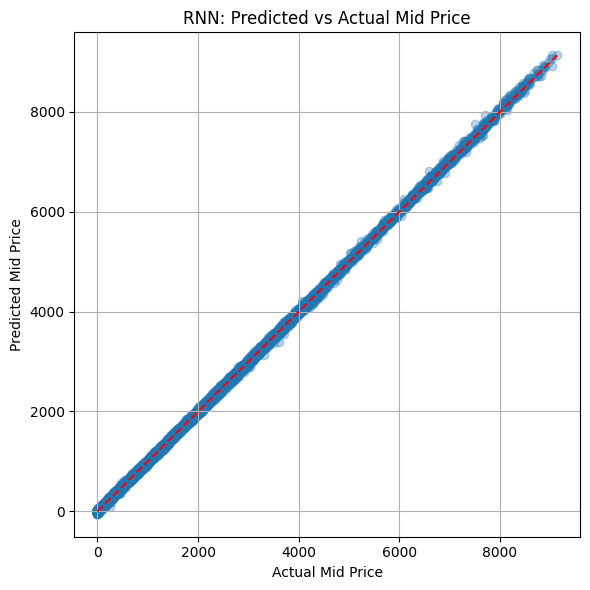

In [ ]:
# Import standard libraries for data handling, model building, and evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load option transaction records and underlying index prices
options = pd.read_csv("./dataset/ndx_option_raw.csv")
underlying = pd.read_csv("./dataset/ndx_close_2023Q1.csv")

# Parse date columns into datetime objects
options['date'] = pd.to_datetime(options['date'])
options['exdate'] = pd.to_datetime(options['exdate'])
underlying['Date'] = pd.to_datetime(underlying['Date'])

# Compute mid-market price as the average of best bid and best offer
options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2

# Merge daily index prices into option records based on trading date
underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)
options = pd.merge(options, underlying, on='date', how='left')

# Encode call/put type: 1 for Call, 0 for Put
options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# Calculate number of days until option expiration
options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days

# Select relevant features and remove records with missing data
selected_features = [
    'underlying_price', 'strike_price', 'cp_flag_encoded', 'days_to_expiry',
    'impl_volatility', 'delta', 'gamma', 'vega', 'theta'
]
df = options[selected_features + ['mid_price']].dropna()

# Define input matrix X and target vector y
X = df[selected_features]
y = df['mid_price']

# Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature values based on training set statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape features into 3D tensors expected by SimpleRNN (samples, timesteps, features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build a simple RNN model for regression
model = Sequential([
    SimpleRNN(64, input_shape=(1, X_train_rnn.shape[2])),  # captures short-term dependencies
    Dense(32, activation='relu'),                         # nonlinear layer
    Dense(1)                                               # output layer for continuous prediction
])
model.compile(optimizer='adam', loss='mse')

# Train the RNN model with validation monitoring
history = model.fit(
    X_train_rnn, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2
)

# Make predictions on the test set
y_pred = model.predict(X_test_rnn).flatten()

# Calculate regression performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Test MSE: {mse:.4f}")
print(f"Test R²:  {r2:.4f}")

# Visualize predicted vs actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', label='Perfect Prediction'
)
plt.xlabel("Actual Mid Price")
plt.ylabel("Predicted Mid Price")
plt.title("Predicted vs Actual Mid Prices (SimpleRNN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Group K Fold

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/41089307.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date']= pd.to_datetime(underlying['Date'])



--- Fold 1 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step
Fold 1 — MSE: 81.91, R²: 0.9999

--- Fold 2 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4831/4831 ━━━━━━━━━━━━━━━━━━━━ 2s 317us/step
Fold 2 — MSE: 251.94, R²: 0.9998

--- Fold 3 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4420/4420 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step
Fold 3 — MSE: 831.56, R²: 0.9994

--- Fold 4 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4407/4407 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step
Fold 4 — MSE: 156.71, R²: 0.9999

--- Fold 5 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step
Fold 5 — MSE: 142.73, R²: 0.9999

Cross‑Validation Summary:
MSE scores: [81.90753072093474, 251.94454927856918, 831.5636737519364, 156.7114240788706, 142.73042952992398]
R² scores : [0.9999420093345563, 0.9998270455773944, 0.9993973787941459, 0.9998809466953463, 0.9998911651325577]
Average MSE: 292.97
Average R² : 0.9998


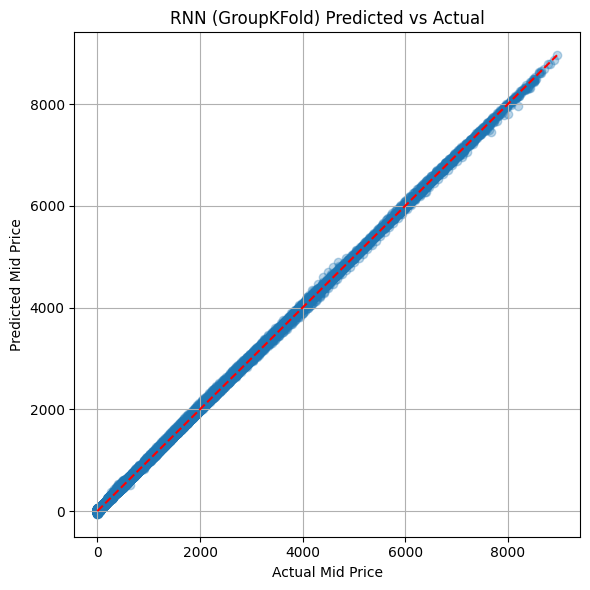

In [ ]:
# Import libraries for data processing, model training, and visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load option market data and underlying index closing prices
options = pd.read_csv("dataset/ndx_option_raw.csv")
underlying = pd.read_csv("dataset/ndx_close_2023Q1.csv")

# Parse columns containing dates
options['date'] = pd.to_datetime(options['date'])
options['exdate'] = pd.to_datetime(options['exdate'])
underlying['Date'] = pd.to_datetime(underlying['Date'])

# Rename underlying date column for easier merging
underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)

# Calculate mid-market price as the average of best bid and offer
options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2

# Compute the number of days remaining until expiration
options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days

# Encode option type: 1 = Call, 0 = Put
options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# Merge option records with daily underlying prices on trading date
df = pd.merge(options, underlying[['date', 'underlying_price']], on='date', how='left')

# Keep only records with complete feature information
required_cols = [
    'underlying_price', 'strike_price', 'cp_flag_encoded', 'days_to_expiry',
    'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'mid_price'
]
df = df.dropna(subset=required_cols)

# Extract feature matrix X, target variable y, and grouping variable (date)
feature_cols = [
    'underlying_price', 'strike_price', 'cp_flag_encoded', 
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta'
]
X = df[feature_cols].values
y = df['mid_price'].values
groups = df['date'].values  # used for grouping in cross-validation

# Standardize features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize GroupKFold cross-validator based on trade dates
gkf = GroupKFold(n_splits=5)
mse_scores = []
r2_scores = []

for fold_idx, (train_idx, test_idx) in enumerate(gkf.split(X_scaled, y, groups)):
    print(f"\n--- Fold {fold_idx + 1} ---")

    # Split training and testing sets for the current fold
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Reshape input data to match RNN expected shape (samples, timesteps, features)
    X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build a SimpleRNN-based regression model
    model = Sequential([
        SimpleRNN(64, input_shape=(1, X_train_rnn.shape[2])),
        Dense(32, activation='relu'),
        Dense(1)  # single regression output
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the RNN model without verbose output
    model.fit(
        X_train_rnn, y_train,
        epochs=30,
        batch_size=64,
        verbose=0
    )

    # Generate predictions and evaluate on the test set
    y_pred = model.predict(X_test_rnn).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold_idx + 1} — MSE: {mse:.2f}, R²: {r2:.4f}")

# Summarize cross-validation performance across folds
print("\nCross-Validation Summary:")
print("MSE per fold:", mse_scores)
print("R² per fold :", r2_scores)
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average R² : {np.mean(r2_scores):.4f}")

# Plot actual vs predicted mid-prices for the last fold
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', label='Perfect Prediction Line'
)
plt.xlabel("Actual Mid Price")
plt.ylabel("Predicted Mid Price")
plt.title("SimpleRNN Model: Predicted vs Actual Mid Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# CNN + Group K Fold

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/1939004591.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date']= pd.to_datetime(underlying['Date'])



--- Fold 1 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step
Fold 1 — MSE: 27018.38, R²: 0.9809

--- Fold 2 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4831/4831 ━━━━━━━━━━━━━━━━━━━━ 2s 342us/step
Fold 2 — MSE: 17561.22, R²: 0.9879

--- Fold 3 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4420/4420 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step
Fold 3 — MSE: 9567.86, R²: 0.9931

--- Fold 4 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4407/4407 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step
Fold 4 — MSE: 10081.61, R²: 0.9923

--- Fold 5 ---


/opt/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 1s 298us/step
Fold 5 — MSE: 12138.98, R²: 0.9907

Cross‑Validation Summary:
MSE scores: [27018.37659704155, 17561.219587731914, 9567.85629650455, 10081.612616120534, 12138.980325200942]
R² scores : [0.9808709452686648, 0.987944606848041, 0.9930663239859631, 0.9923410223265972, 0.9907437795925577]
Average MSE: 15273.61
Average R² : 0.9890


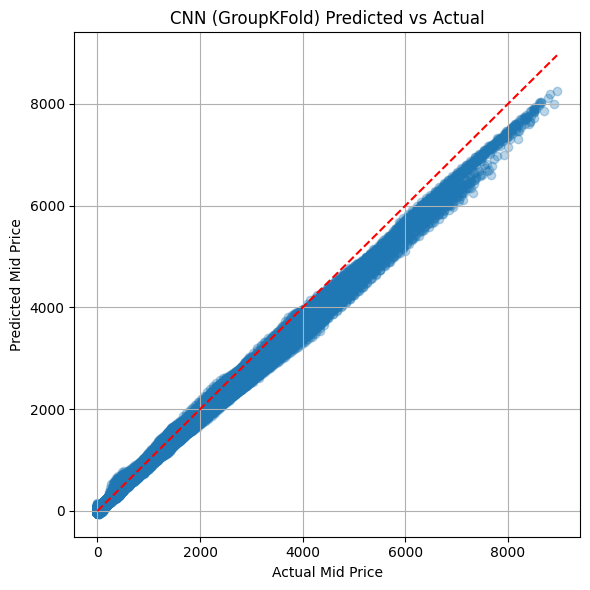

In [ ]:
# Import essential libraries for data handling, modeling, and evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load the raw option quotes and index closing prices
options = pd.read_csv("dataset/ndx_option_raw.csv")
underlying = pd.read_csv("dataset/ndx_close_2023Q1.csv")

# Parse date columns to proper datetime format
options['date'] = pd.to_datetime(options['date'])
options['exdate'] = pd.to_datetime(options['exdate'])
underlying['Date'] = pd.to_datetime(underlying['Date'])

# Standardize column names for merging
underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)

# Engineer key features: mid-price, days to expiry, and option type encoding
options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2
options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days
options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# Merge option data with underlying index prices by trade date
df = pd.merge(options, underlying[['date', 'underlying_price']], on='date', how='left')

# Retain only rows with complete feature information
required_features = [
    'underlying_price', 'strike_price', 'cp_flag_encoded', 'days_to_expiry',
    'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'mid_price'
]
df = df.dropna(subset=required_features)

# Prepare the feature matrix X, target vector y, and group labels
feature_cols = [
    'underlying_price', 'strike_price', 'cp_flag_encoded',
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta'
]
X = df[feature_cols].values
y = df['mid_price'].values
groups = df['date'].values  # Group by trade date to prevent leakage

# Normalize features using standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features to match 1D-CNN expected input shape: (samples, timesteps, channels)
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Initialize GroupKFold for cross-validation on non-overlapping dates
gkf = GroupKFold(n_splits=5)
mse_scores = []
r2_scores = []

for fold_idx, (train_idx, test_idx) in enumerate(gkf.split(X_cnn, y, groups), 1):
    print(f"\n--- Fold {fold_idx} ---")

    # Partition the training and test data for this fold
    X_train, X_test = X_cnn[train_idx], X_cnn[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Define the 1D CNN regression model
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Conv1D(filters=16, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)  # Single continuous output
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model silently for a fixed number of epochs
    model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0)

    # Evaluate model performance on the validation set
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold_idx} — MSE: {mse:.2f}, R²: {r2:.4f}")

# Display overall cross-validation performance
print("\nCross-Validation Summary:")
print("MSE per fold:", mse_scores)
print("R² per fold :", r2_scores)
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average R² : {np.mean(r2_scores):.4f}")

# Visualize predicted vs actual mid prices from the final fold
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', label='Perfect Prediction Line'
)
plt.xlabel("Actual Mid Price")
plt.ylabel("Predicted Mid Price")
plt.title("1D-CNN Model: Predicted vs Actual Mid Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Transformer + Group K Fold

/var/folders/qy/7jvf7f8x5g1bdw0l864hm93w0000gn/T/ipykernel_82632/1822190799.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying['Date']= pd.to_datetime(underlying['Date'])



--- Fold 1 ---
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 3s 714us/step
Fold 1 — MSE: 10151.69, R²: 0.9928

--- Fold 2 ---
4831/4831 ━━━━━━━━━━━━━━━━━━━━ 4s 721us/step
Fold 2 — MSE: 11120.68, R²: 0.9924

--- Fold 3 ---
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 4s 852us/step
Fold 3 — MSE: 22059.16, R²: 0.9840

--- Fold 4 ---
4407/4407 ━━━━━━━━━━━━━━━━━━━━ 3s 737us/step
Fold 4 — MSE: 5193.14, R²: 0.9961

--- Fold 5 ---
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 3s 723us/step
Fold 5 — MSE: 10357.68, R²: 0.9921

Cross‑Validation Summary:
MSE scores: [10151.692709324616, 11120.679858290323, 22059.1580612468, 5193.140009813423, 10357.680358004382]
R² scores : [0.9928125849917411, 0.9923658965062758, 0.9840140727035172, 0.9960547836041214, 0.9921020571963125]
Average MSE: 11776.47
Average R² : 0.9915


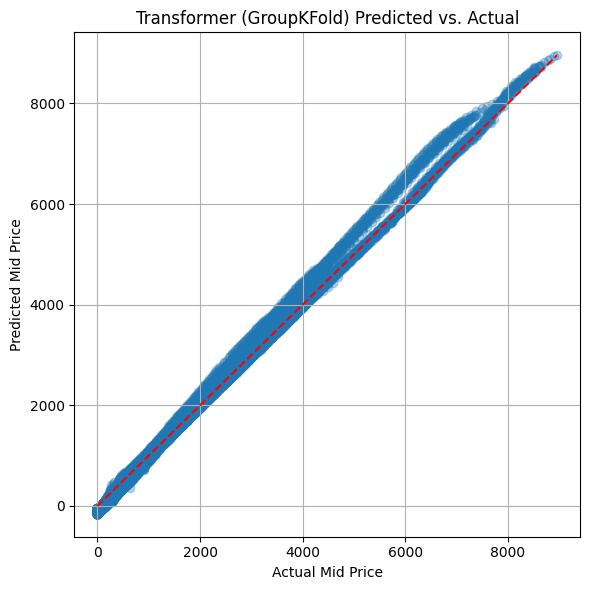

In [ ]:
# Load libraries for data processing, modeling, and evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
import matplotlib.pyplot as plt

# Load option quotes and underlying index prices
options = pd.read_csv("dataset/ndx_option_raw.csv")
underlying = pd.read_csv("dataset/ndx_close_2023Q1.csv")

# Parse dates properly
options['date'] = pd.to_datetime(options['date'])
options['exdate'] = pd.to_datetime(options['exdate'])
underlying['Date'] = pd.to_datetime(underlying['Date'])
underlying.rename(columns={'Date': 'date', 'Close': 'underlying_price'}, inplace=True)

# Basic feature engineering for options
options['mid_price'] = (options['best_bid'] + options['best_offer']) / 2
options['days_to_expiry'] = (options['exdate'] - options['date']).dt.days
options['cp_flag_encoded'] = options['cp_flag'].map({'C': 1, 'P': 0})

# Merge underlying price into options dataset
df = pd.merge(options, underlying[['date', 'underlying_price']], on='date', how='left')

# Remove rows with missing critical values
required_features = [
    'underlying_price', 'strike_price', 'cp_flag_encoded', 
    'days_to_expiry', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 'mid_price'
]
df = df.dropna(subset=required_features)

# Define features, targets, and grouping keys
X = df[['underlying_price', 'strike_price', 'cp_flag_encoded', 'days_to_expiry',
        'impl_volatility', 'delta', 'gamma', 'vega', 'theta']].values
y = df['mid_price'].values
groups = df['date'].values

# Standardize feature inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Format data for Transformer (sequence length = 1)
X_seq = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define a lightweight Transformer encoder model
def build_transformer_model(d_model=64, num_heads=4, dff=128, dropout_rate=0.2):
    inp = Input(shape=(1, X_seq.shape[2]))
    x = Dense(d_model)(inp)
    
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x, x)
    attn_output = Dropout(dropout_rate)(attn_output)
    x = LayerNormalization(epsilon=1e-6)(x + attn_output)
    
    ffn_output = Dense(dff, activation='relu')(x)
    ffn_output = Dense(d_model)(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(x + ffn_output)
    
    x = GlobalAveragePooling1D()(x)
    out = Dense(1)(x)
    return Model(inputs=inp, outputs=out)

# Cross-validation over grouped trading dates
gkf = GroupKFold(n_splits=5)
mse_scores = []
r2_scores = []

for fold_idx, (train_idx, test_idx) in enumerate(gkf.split(X_seq, y, groups), 1):
    print(f"\n--- Fold {fold_idx} ---")
    
    X_train, X_test = X_seq[train_idx], X_seq[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model = build_transformer_model()
    model.compile(optimizer='adam', loss='mse')
    
    model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0)
    
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f"Fold {fold_idx} — MSE: {mse:.2f}, R²: {r2:.4f}")

# Report overall performance
print("\nCross-Validation Results:")
print("MSE:", mse_scores)
print("R² :", r2_scores)
print(f"Mean MSE: {np.mean(mse_scores):.2f}")
print(f"Mean R² : {np.mean(r2_scores):.4f}")

# Visualize predictions vs actuals for the last fold
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Mid Price")
plt.ylabel("Predicted Mid Price")
plt.title("Predicted vs Actual (Transformer)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()